In [38]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(lambda y: ast.literal_eval(y) if pd.notna(y) else y)


df = df[df['job_title_short'] == 'Data Analyst'].copy()

In [39]:
df_exploded = df.explode('job_skills')
df_exploded.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."


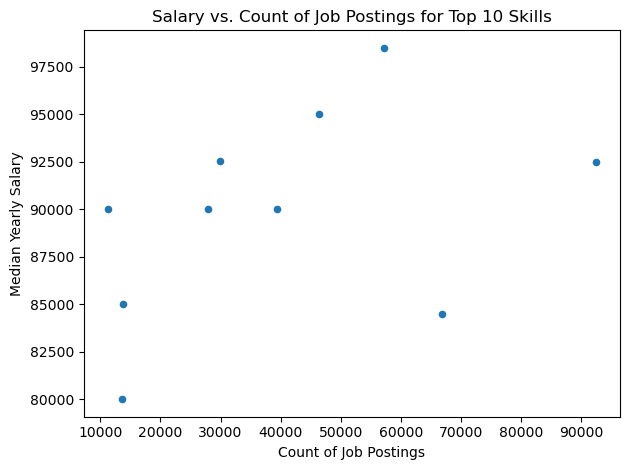

In [40]:
skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary = ('salary_year_avg', 'median'),
    skill_count = ('job_skills', 'count')
)

skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()
plt.show()

In [41]:
skill_stats

,median_salary,skill_count
job_skills,,
sql,92500.0,92428
excel,84479.0,66860
python,98500.0,57190
tableau,95000.0,46455
power bi,90000.0,39380
r,92527.5,29996
sas,90000.0,27998
powerpoint,85000.0,13822
word,80000.0,13562


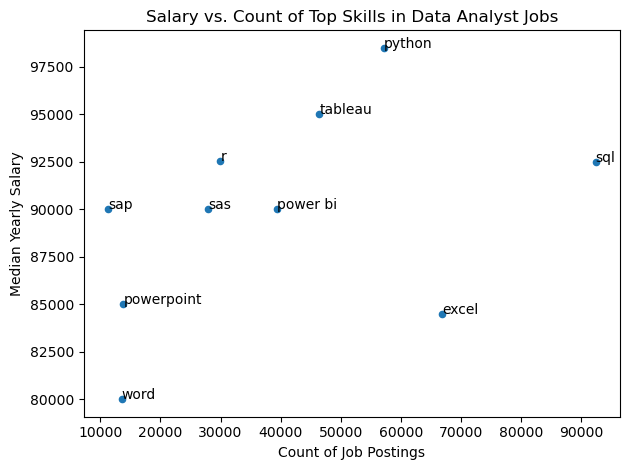

In [42]:
# plt.text() function to label the points in scatter plot

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Top Skills in Data Analyst Jobs')
plt.tight_layout()
plt.show()

In [43]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(lambda y: ast.literal_eval(y) if pd.notna(y) else y)

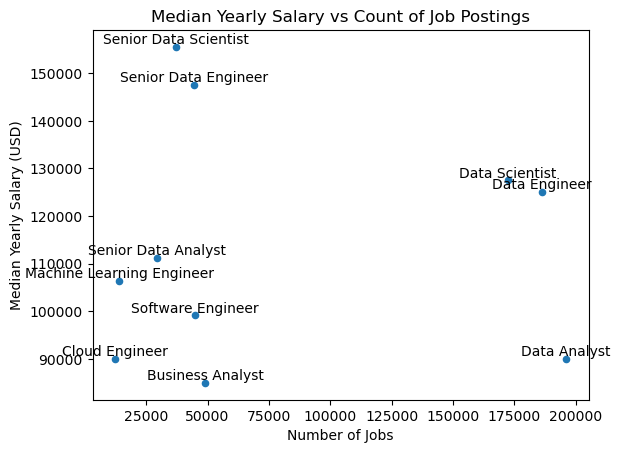

In [44]:
# Problem_1

job_title_stats = df.groupby('job_title_short').agg(
    median_salary_year_avg = ('salary_year_avg', 'median'),
    job_count = ('job_title_short', 'count')
).dropna()

job_title_stats.plot(kind='scatter', x='job_count', y='median_salary_year_avg')
plt.xlabel('Number of Jobs')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Median Yearly Salary vs Count of Job Postings')

# Adding job title labels to each point
for i in range(len(job_title_stats)):
    job_count = job_title_stats['job_count'].iloc[i]
    mean_salary = job_title_stats['median_salary_year_avg'].iloc[i]
    job_title = job_title_stats.index[i]
    plt.text(job_count, mean_salary, job_title, ha='center', va='bottom')

plt.show()

In [45]:
job_title_stats

,median_salary_year_avg,job_count
job_title_short,,
Business Analyst,85000.0,49063
Cloud Engineer,90000.0,12331
Data Analyst,90000.0,196075
Data Engineer,125000.0,186241
Data Scientist,127500.0,172286
Machine Learning Engineer,106415.0,14080
Senior Data Analyst,111175.0,29216
Senior Data Engineer,147500.0,44563
Senior Data Scientist,155500.0,36957


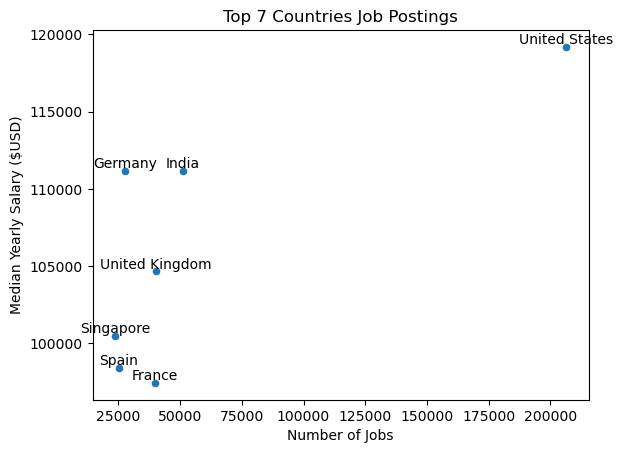

In [46]:
# Problem_2

stats_country = df.groupby('job_country').agg(
    median_salary_year_avg = ('salary_year_avg', 'median'),
    job_count = ('job_country', 'count')
).dropna()

top_countries = stats_country.sort_values(by='job_count', ascending=False).head(7)

top_countries.plot(kind='scatter', x='job_count', y='median_salary_year_avg')
plt.xlabel('Number of Jobs')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Top 7 Countries Job Postings')


for i in range(len(top_countries)):
    job_count = top_countries['job_count'].iloc[i]
    mean_salary = top_countries['median_salary_year_avg'].iloc[i]
    country = top_countries.index[i]
    plt.text(job_count, mean_salary, country, ha='center', va='bottom')

plt.show()

In [47]:
top_countries

,median_salary_year_avg,job_count
job_country,,
United States,119187.5,206292
India,111175.0,51088
United Kingdom,104668.0,40375
France,97444.0,39922
Germany,111175.0,27694
Spain,98391.5,25100
Singapore,100500.0,23696


In [48]:
# Problem_3

# Define specific job titles to include
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

usjobs_df = df[
    (df['job_country'] == 'United States') & 
    (df['job_schedule_type'].isin(['Full-time', 'Contractor'])) 
     & (df['job_title_short'].isin(target_job_titles))
     ]
usjobs_df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","[sql, python, r, mongodb, mongodb, sql server,...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
11,Data Engineer,Data Engineer,"Colorado Springs, CO (+3 others)",via The Muse,Full-time,False,"Texas, United States",2023-11-03 13:06:51,False,True,United States,None,NaN,NaN,Philips,"[python, qlik]","{'analyst_tools': ['qlik'], 'programming': ['p..."
17,Data Scientist,Data Science Team Lead,"Laurel, MD",via APL Careers - Johns Hopkins University App...,Full-time,False,Georgia,2023-06-13 13:25:17,False,True,United States,None,NaN,NaN,Johns Hopkins Applied Physics Laboratory,"[go, apl, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
26,Data Engineer,Data Engineer,United States,via LinkedIn,Full-time,False,Georgia,2023-09-15 13:56:18,True,False,United States,None,NaN,NaN,Infinite Computer Solutions,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"[python, matlab, r]","{'programming': ['python', 'matlab', 'r']}"
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


In [49]:
# group by job schedule type and job title, calculate mean yerly salary and job count
stats = usjobs_df.groupby(['job_schedule_type', 'job_title_short']).agg(
    mean_yearly_salary = ('salary_year_avg', 'mean'),
    job_count = ('job_title_short', 'count')
)

stats

mean_yearly_salary  job_count
job_schedule_type job_title_short                               
Contractor        Data Analyst           87027.197142       6000
                  Data Engineer         117772.326225       4922
                  Data Scientist        118568.074155       3252
Full-time         Data Analyst           95072.545202      57180
                  Data Engineer         133804.432239      28003
                  Data Scientist        140848.379828      51570

In [50]:
# Reset index 

stats.reset_index(inplace=True)
stats

,job_schedule_type,job_title_short,mean_yearly_salary,job_count
0,Contractor,Data Analyst,87027.197142,6000
1,Contractor,Data Engineer,117772.326225,4922
2,Contractor,Data Scientist,118568.074155,3252
3,Full-time,Data Analyst,95072.545202,57180
4,Full-time,Data Engineer,133804.432239,28003
5,Full-time,Data Scientist,140848.379828,51570


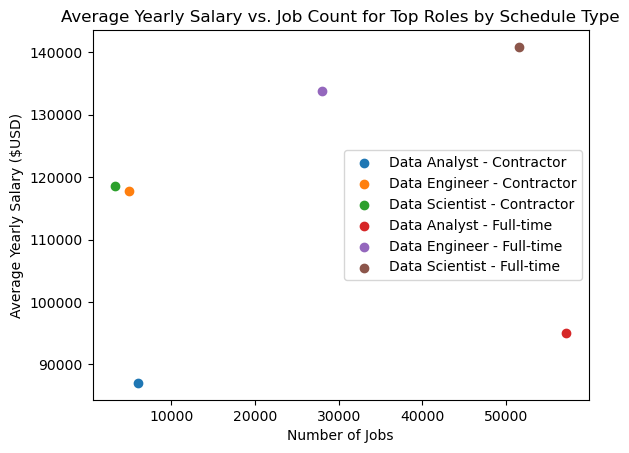

In [56]:
# Combine job title and job schedule type in one value for labels

stats['job_title_type'] = stats['job_title_short'] + ' - ' + stats['job_schedule_type']

# Plot

for job_title_type in stats['job_title_type'].unique():
    subset = stats[stats['job_title_type'] == job_title_type]
    plt.scatter(subset['job_count'], subset['mean_yearly_salary'], label=job_title_type)


plt.xlabel('Number of Jobs')
plt.ylabel('Average Yearly Salary ($USD)')
plt.title('Average Yearly Salary vs. Job Count for Top Roles by Schedule Type')
plt.legend()
plt.show()
